In [2]:
#modules
import pandas as pd
import numpy as np
import sys
import os
from tqdm.notebook import tqdm 
import seaborn as sns
import matplotlib.pyplot as plt
from src import data
import matplotlib as mpl

### Work done previously

Scripts used before establishing the src/data library for this project

In [2]:
#gather all dStec data into one dataframe
#following Val's method of obtaining all text files
# all data is in the HashMap "dStecV_day" with keys 300-304
#each key has a dataframe of all the sTec Values

# def obtainStationPair(file : str):
#     '''
#     input: file name
#     output: grdStation + Day + _Satellite
#     '''
#     return file[:4] + file[12:16]

# days = [300, 301, 302, 303, 304]

# filePath = '../data/'
# folders = os.listdir(filePath)
# folders = sorted(folders)
# dStecValues_day = dict()
# start = 300
# for day in folders:
#     dayFp = filePath + day + '/'
#     dStec_data = list()
#     subFiles = os.listdir(dayFp)
#     for file in tqdm(subFiles):
#         idPair = obtainStationPair(file)
#         fileName = dayFp + file
#         df = pd.read_csv(fileName, sep='\t\t', index_col='sod')
#         df = df.rename(columns={'dsTEC/dt' : idPair})
#         dStec_data.append(df[idPair])
#     sTec_columns = pd.concat(dStec_data, axis=1)
#     dStecValues_day[start] = sTec_columns
#     start += 1

    
    
#use dStecValues_day to do any analysis

In [4]:
#begin accounting for daily averages of each station/satellite pair and plotting them accordingly
valueMap = dStecValues_day

dailyAvg = pd.DataFrame({'days': days}) #dataframe of all the daily averages from each sat/groundstation pair
for key in valueMap:
    currDf = valueMap[key]
    cols = list(currDf.columns)
    for stationPair in tqdm(cols):
        runMean = currDf[stationPair].mean()
        if stationPair in dailyAvg:
            dailyAvg.at[key - 300, stationPair] = runMean
        else:
            dailyAvg[stationPair] = np.full(5, np.nan)
            dailyAvg.at[key - 300, stationPair] = runMean
dailyAvg.set_index('days')


        

,pg2r_G03,pg2r_G17,ktpm_G22,pgf1_G17,pgf1_G03,pmau_G08,pmau_G20,pgf6_G13,pgf6_G07,mlsp_G12,...,pmau_G11,pmau_G05,ktpm_G07,pg2r_G26,ktpm_G13,pgf3_G26,pgf5_G01,pgf3_G15,pgf3_G09,pgf3_G12
days,,,,,,,,,,,,,,,,,,,,,
300,-0.000819,0.000095,-0.004905,0.001385,-0.000761,-0.001210,-0.000446,-0.002074,-0.002330,0.002025,...,-0.000384,0.000006,-0.002180,0.001501,-0.001919,NaN,NaN,NaN,NaN,NaN
301,-0.002515,0.000886,-0.004418,0.000961,-0.002627,-0.001191,-0.000759,-0.002438,-0.001877,0.002489,...,0.001215,0.000394,-0.001767,0.001271,-0.002565,-0.002975,0.000853,NaN,NaN,NaN
302,-0.003562,0.001510,-0.003284,0.001908,-0.005694,-0.000998,-0.000714,-0.001366,-0.001960,0.002603,...,0.001325,0.000192,-0.001797,0.001491,-0.001385,-0.001181,NaN,-0.001330,NaN,NaN
303,-0.003431,0.000530,-0.004717,0.000962,-0.003254,-0.001294,-0.000409,-0.002104,-0.001738,0.001364,...,-0.001269,0.000499,-0.001557,0.001366,-0.002191,-0.001221,-0.001233,-0.001140,-0.002408,NaN
304,-0.002642,0.001218,-0.003697,0.001398,-0.002655,-0.001031,-0.000735,-0.001489,-0.001943,0.001860,...,0.000656,0.000289,-0.001836,0.001448,-0.001488,-0.000527,0.000314,-0.001004,-0.000973,-0.0017


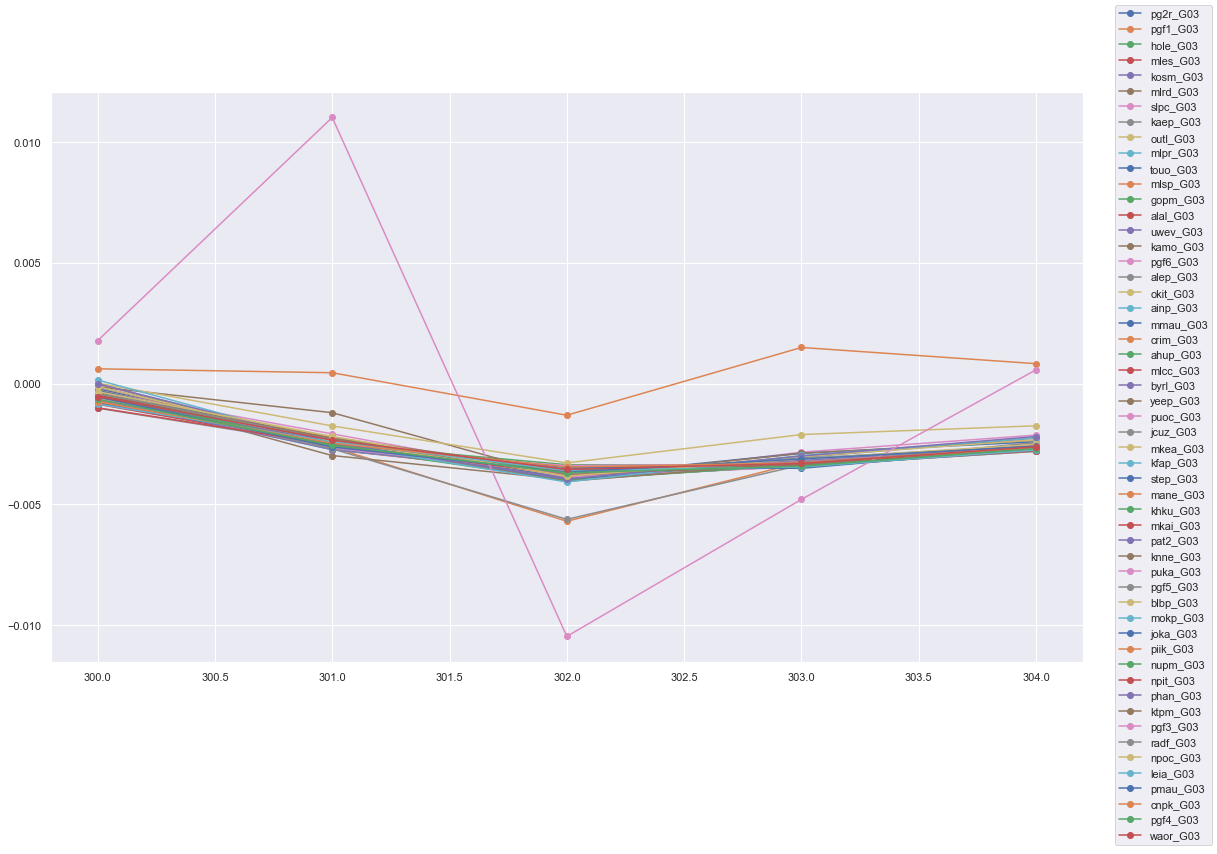

In [103]:
#plot for daily averages given a satellite ID
def plot_Satellite(satellite: str, dataF: pd.DataFrame):
    sns.set(style="darkgrid")
    for col in dailyAvg.columns:
        if col == 'days' or col[5:8] != satellite:
            continue
        else:
            plt.plot('days', col, data=dataF, marker='o')

    
    return plt.gcf()
#sample plot of G03
a = plot_Satellite('G03', dailyAvg)
a.legend()
a.set_size_inches(18.5, 10.5)




### Work with src library

1. obtaining the daily, hourly, and minute averages of the sTEC values for each station+satellite pair
2. Graph them accordingly 

In [3]:
#read all the dataframes and concatenate all of them 
days = [i for i in range(300, 305)]
dfList = list()
for day in days:
    dayDf = data.read_day('hawaii', 2012, day)
    dayDf = dayDf.filter(regex='[a-z][a-z][a-z0-9][a-z0-9]__G\d\d$', axis=1)
    dfList.append(dayDf)
totalData = pd.concat(dfList) #acts as the container for all the sTEC values

  0%|          | 7/1595 [00:00<00:23, 67.33it/s]

Reading dataframes...


100%|██████████| 1595/1595 [00:23<00:00, 68.01it/s]


Concatenating dataframes...


  0%|          | 7/1596 [00:00<00:24, 64.41it/s]

Reading dataframes...


100%|██████████| 1596/1596 [00:23<00:00, 67.19it/s]


Concatenating dataframes...


  1%|          | 9/1597 [00:00<00:19, 81.32it/s]

Reading dataframes...


100%|██████████| 1597/1597 [00:24<00:00, 65.85it/s]


Concatenating dataframes...


  0%|          | 6/1597 [00:00<00:26, 59.47it/s]

Reading dataframes...


100%|██████████| 1597/1597 [00:24<00:00, 65.52it/s]


Concatenating dataframes...


  0%|          | 7/1596 [00:00<00:24, 64.07it/s]

Reading dataframes...


100%|██████████| 1596/1596 [00:24<00:00, 65.36it/s]


Concatenating dataframes...


In [4]:
#day, hr, min containers
sTEC_day = totalData.groupby([totalData.index.day])
sTEC_hr = totalData.groupby(np.arange(len(totalData))//240) 
sTEC_min = totalData.groupby(np.arange(len(totalData))//4)
day_avg = sTEC_day.mean()

In [72]:
#plotly functions and what not
import plotly.express as px
import plotly.graph_objects as go

def plot_all(data : pd.DataFrame) -> go.Figure:
    '''
    Takes in a dataframe and plots each column according to the index column
    :param data: dataframe that needs to be plotted
    :return: A plotly figure Scatter object
    '''
    fig = go.Figure()
    for col in data:
        fig.add_traces(go.Scatter(x=data.index, y=data[col], name=col))
    return fig

In [5]:
#filter by ground station
ground_stations = list()
for cols in day_avg.columns:
    if cols[:4] in ground_stations:
        continue
    ground_stations.append(cols[:4])

In [6]:
# creating all the plots for each ground station
figures = list()
for station in ground_stations:
    fig = plot_all(day_avg.filter(regex=station, axis=1))
    fig.update_layout(title_text =station + ' ground station averages')
    figures = figures + [fig]

In [70]:
#simple graphing functions to contain all the averages accordingly in a list and separate either by ground station
# or by satellite

def stationFigures(data: pd.DataFrame, title: str) -> dict:
    '''
    takes a dataframe and returns a dictionary with keys as the ground station and buckets as the plot
    '''
    ground_stations = list()
    for cols in data.columns:
        if cols[:4] in ground_stations:
            continue
        ground_stations.append(cols[:4])
    figures = dict()
    for station in ground_stations:
        fig = plot_all(data.filter(regex=station, axis=1))
        fig.update_layout(title_text =station + ' ground station ' + title)
        figures[station] = fig
    return figures

def satelliteFigures(data: pd.DataFrame, title: str) -> dict:
    '''
    takes a dataframe and returns keys as the satellite and buckets as the plot
    '''
    satellites = list()
    for cols in data.columns:
        if cols[-3:] in satellites:
            continue
        satellites.append(cols[-3:])
    figures = dict()
    for sat in satellites:
        fig = plot_all(data.filter(regex=sat, axis=1))
        fig.update_layout(title_text =sat + ' satellite ' + title)
        figures[sat] = fig
    return figures

### Working to find satellites G10, G20, G04, G07 and G08

obtain and graph the hourly and daily averages of those satellites

Look into the AHUP station according to the paper

Use seaborn and matplotlib instead of plotly

gonna try and get rid of `elev` values with higher than 15 degress

In [4]:
sTEC_day = totalData.groupby([totalData.index.day])
sTEC_hr = totalData.groupby(np.arange(len(totalData))//240) 
sTEC_min = totalData.groupby(np.arange(len(totalData))//4)
day_avg = sTEC_day.mean()
hr_avg = sTEC_hr.mean()
min_avg = sTEC_min.mean()

In [5]:
#only obtaining the plots for ahup_G10,20, 13, 23, 4, 7, 8 accroding to paper
targetSat_min = pd.concat([min_avg.filter(regex='ahup__G[0][478]', axis=1), min_avg.filter(regex='ahup__G[1][03]', axis=1), min_avg.filter(regex='ahup__G[2][03]', axis=1)], axis=1)


In [6]:
#obtaining day 302 values
targetSat_min = targetSat_min[3350:3500]

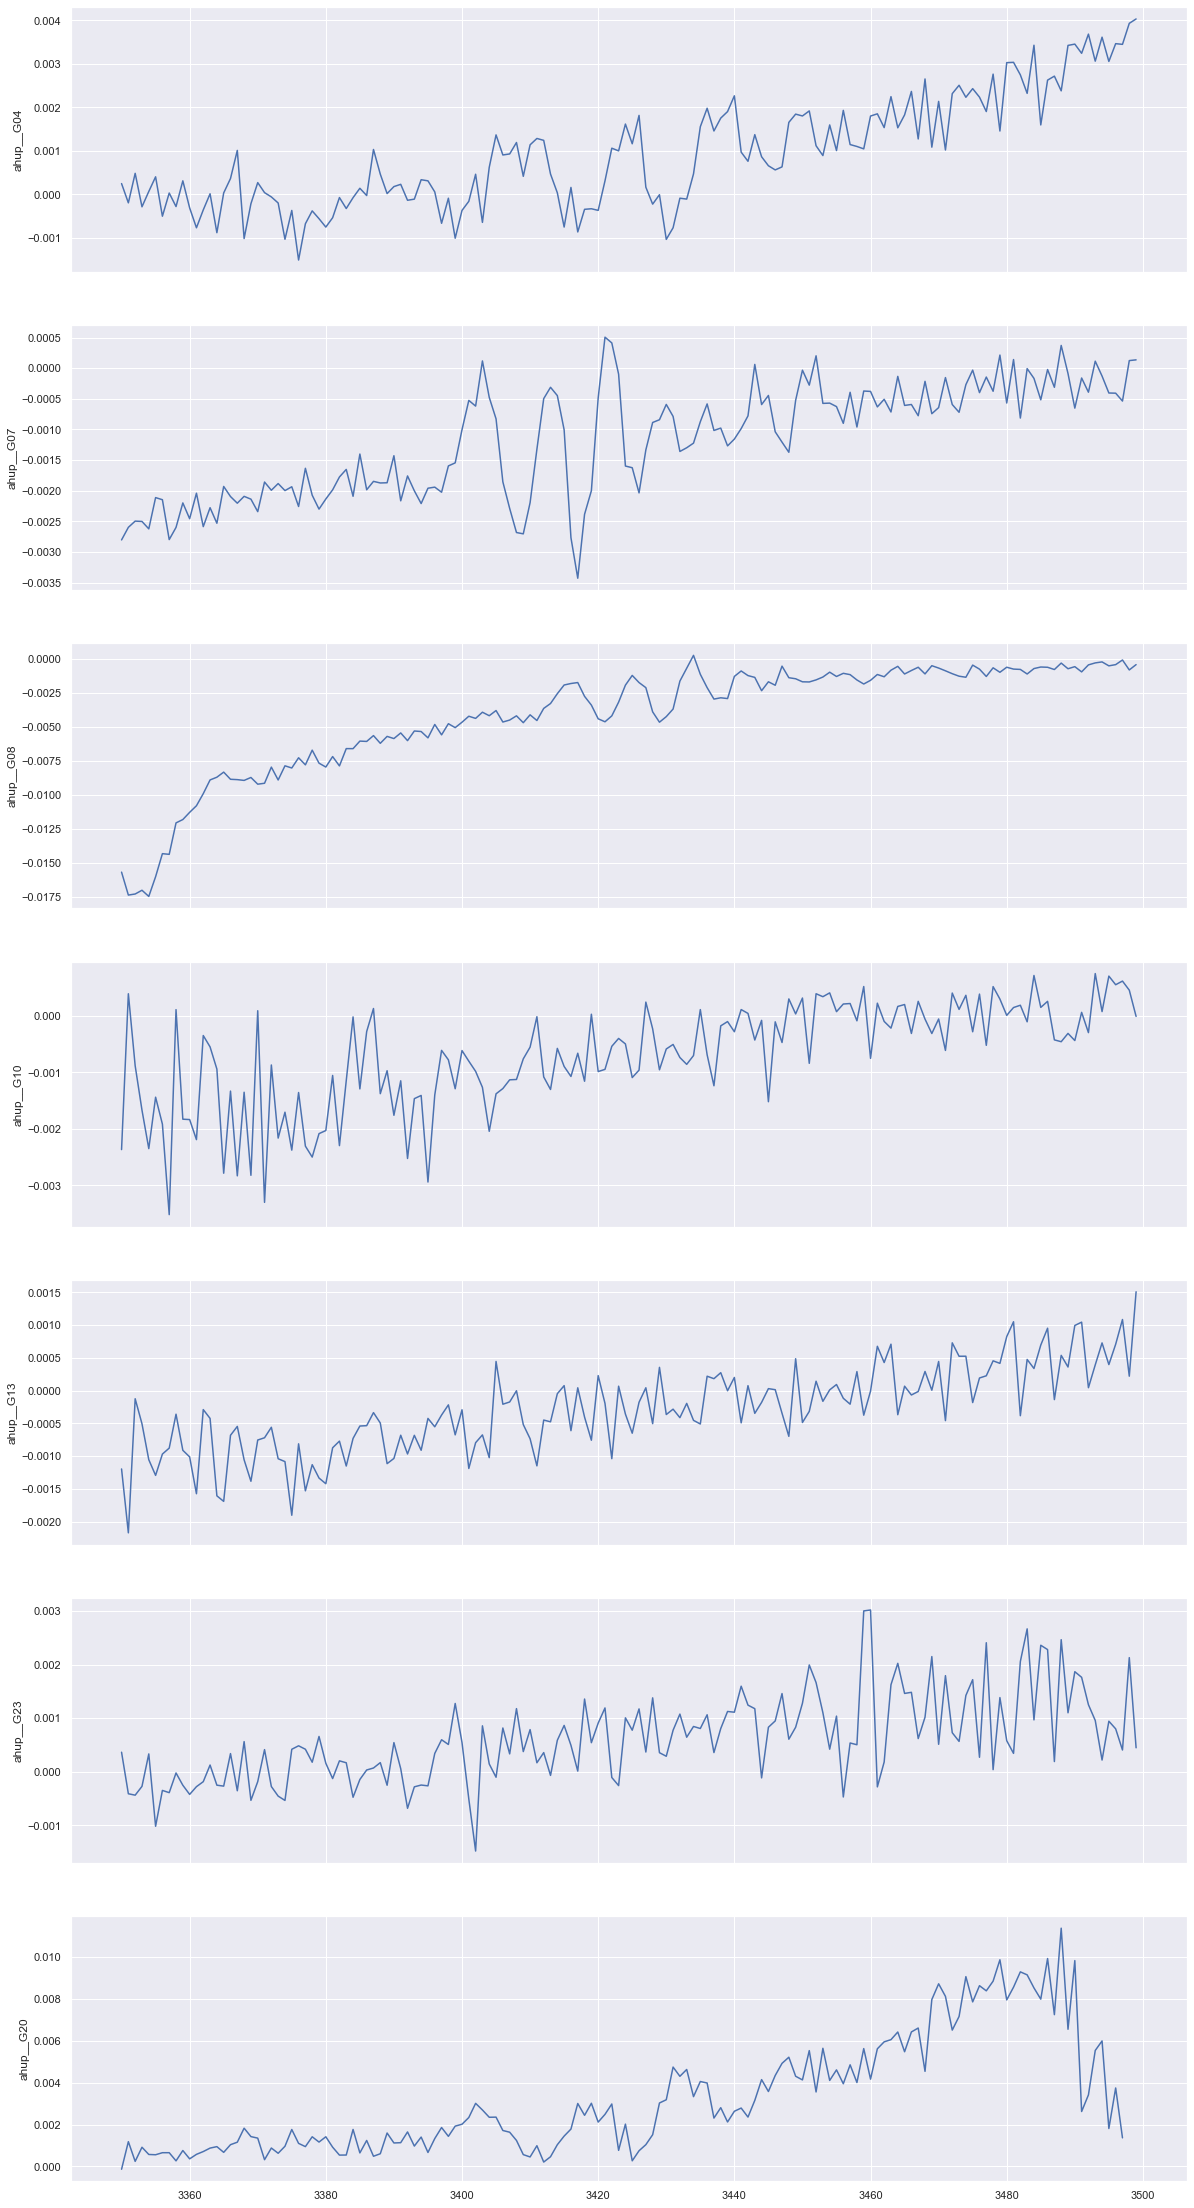

In [10]:
#trying to recreate subplots from the paper
sns.set(style="darkgrid")
f, axes = plt.subplots(7, 1, figsize=(20, 40), sharex=True)
i = 0
for sat in targetSat_min:
    sns.lineplot(x=targetSat_min.index, y=sat, ax=axes[i], data=targetSat_min)
    i += 1
    

In [11]:
f.savefig('testing.png')